In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def numerical_derivative(f, x):
        delta_x = 1e-4 # 0.0001
        grad = np.zeros_like(x)
    
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
        while not it.finished:
            idx = it.multi_index        
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + delta_x
            fx1 = f(x) # f(x+delta_x)
        
            x[idx] = float(tmp_val) - delta_x 
            fx2 = f(x) # f(x-delta_x)
            grad[idx] = (fx1 - fx2) / (2*delta_x)
        
            x[idx] = tmp_val 
            it.iternext()   
        
        return grad

In [3]:
class LinearRegressionTest:
    def __init__(self, x_data, t_data, learning_rate, iteration_count):
        
        # 가중치 W 형상을 자동으로 구하기 위해 입력데이터가 vector 인지,
        # 아니면 matrix 인지 체크 후, 
        # self.xdata 는 무조건 matrix 로 만들어 주면 코드 일관성이 있음
        if x_data.ndim == 1:    # vector
            self.x_data = x_data.reshape(len(x_data), 1)
            self.t_data = t_data.reshape(len(t_data), 1)
        elif x_data.ndim == 2:  # matrix
            self.x_data = x_data
            self.t_data = t_data
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.x_data.shape[1], 1)
        self.b = np.random.rand(1)
        
        self.loss_val_list = []
        
        print("LinearRegressionTest Object is created.\n")
        
    def get_W_b(self):
        return self.W, self.b
        
    def __loss_func(self):
        y = np.dot(self.x_data, self.W) + self.b
    
        return (np.sum((self.t_data - y)**2)) / (len(self.x_data))
    
    # 손실함수 값 계산 함수
    # 입력변수 x, t : numpy type
    def __loss_val(self):
        y = np.dot(self.x_data, self.W) + self.b
    
        return (np.sum((self.t_data - y)**2)) / (len(self.x_data))

    def train(self):
        f = lambda x : self.__loss_func()
        
        print("Initial error value = ", self.__loss_val() , "\n", "Initial W = ", self.W, "\n", ", b = ", self.b )

        start_time = datetime.now()

        for step in range(self.iteration_count):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if step % (int)(0.05*self.iteration_count) == 0:
                print("step = ", step, "loss value = ", self.__loss_val())
                self.loss_val_list.append(self.__loss_val())
        
        end_time = datetime.now()

        print("")
        print("Elapsed Time => ", end_time - start_time)
        
    def display_lossval_trend(self):
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        plt.plot(self.loss_val_list, ls='--', lw=2, label='lr={}, epoch={}'.format(self.learning_rate, self.iteration_count))
        plt.legend(loc='best')

        plt.show()
    
    # 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
    # 입력변수 x : numpy type
    def predict(self, test_data):
        y = np.dot(test_data, self.W) + self.b
    
        return y

In [4]:
try:
    loaded_data =  np.loadtxt('./sps.csv', delimiter=',', dtype=np.float32)
    
    x_data = loaded_data[ : , :-1]
    t_data = loaded_data[ : , [-1]]

    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

except FileNotFoundError as err:
    print(str(err))
except IndexError as err:
    print(str(err))
except Exception as err:
    print(str(err))

x_data.ndim =  2 , x_data.shape =  (50, 4)
t_data.ndim =  2 , t_data.shape =  (50, 1)


In [5]:
obj1 = LinearRegressionTest(x_data, t_data, 1e-3, 20001)
obj1.train()

LinearRegressionTest Object is created.

Initial error value =  45.54746161183054 
 Initial W =  [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]] 
 , b =  [0.4236548]
step =  0 loss value =  39.97037124733441
step =  1000 loss value =  0.01423994537496498
step =  2000 loss value =  0.0017298923585877181
step =  3000 loss value =  0.00021148383057585822
step =  4000 loss value =  2.585446038955902e-05
step =  5000 loss value =  3.1607765047592983e-06
step =  6000 loss value =  3.864133291740798e-07
step =  7000 loss value =  4.724005659326546e-08
step =  8000 loss value =  5.775222484453521e-09
step =  9000 loss value =  7.060362994927846e-10
step =  10000 loss value =  8.631481428633986e-11
step =  11000 loss value =  1.0552215475491281e-11
step =  12000 loss value =  1.2900363905236163e-12
step =  13000 loss value =  1.5771037773183178e-13
step =  14000 loss value =  1.9280512956453528e-14
step =  15000 loss value =  2.3570939923788943e-15
step =  16000 loss value =  2.8816100

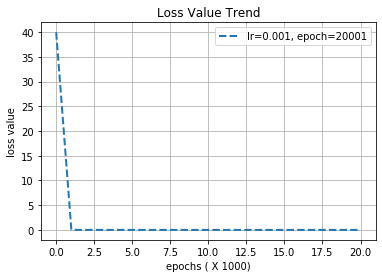

In [6]:
obj.display_lossval_trend()

In [8]:
print("predict_value: ", obj1.predict(np.array([5, 6, 7, 8])))

predict_value:  [2.]


In [8]:
obj2 = LinearRegressionTest(x_data, t_data, 1e-4, 80001)
obj2.train()

LinearRegressionTest Object is created.

Initial error value =  64.45914651718505 
 Initial W =  [[0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]] 
 , b =  [0.38344152]
step =  0 loss value =  63.663443917363054
step =  1000 loss value =  4.652308743966487
step =  2000 loss value =  1.4517296964231874
step =  3000 loss value =  0.4769793416658176
step =  4000 loss value =  0.1727987357665754
step =  5000 loss value =  0.07469490283434937
step =  6000 loss value =  0.04056134467574345
step =  7000 loss value =  0.026769651140859357
step =  8000 loss value =  0.01983260075597924
step =  9000 loss value =  0.015506339005916778
step =  10000 loss value =  0.012395836888567038
step =  11000 loss value =  0.009995525116549995
step =  12000 loss value =  0.008086744917828055
step =  13000 loss value =  0.006550691270908382
step =  14000 loss value =  0.005308924824359094
step =  15000 loss value =  0.004303321583402075
step =  16000 loss value =  0.0034884329445303477
step =  17000 los

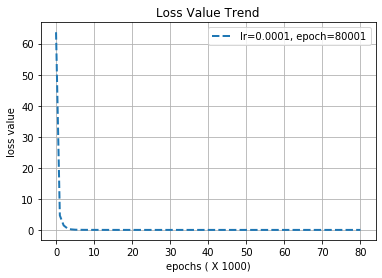

In [9]:
obj2.display_lossval_trend()